In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")

# A:

In [2]:
happ_df = pd.read_csv('happiness_data.csv')

In [3]:
happ_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [4]:
# dimensions of the data
happ_df.shape

(1949, 11)

In [5]:
# to check continuous and categorical attributes
happ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [6]:
# summary of the data
happ_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [7]:
happ_df.isnull().sum().sum()

373

In [8]:
happ_df[happ_df['Log GDP per capita'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
423,Cuba,2006,5.418,NaN,0.970,68.44,0.281,NaN,NaN,0.647,0.277
436,Cyprus,2020,6.260,NaN,0.806,74.10,0.763,NaN,0.816,0.759,0.284
709,Hong Kong S.A.R. of China,2020,5.295,NaN,0.813,NaN,0.705,NaN,0.380,0.609,0.210
771,Iran,2018,4.278,NaN,0.674,66.00,0.603,NaN,0.703,0.553,0.493
772,Iran,2019,5.006,NaN,0.698,66.30,0.623,NaN,0.728,0.600,0.449
773,Iran,2020,4.865,NaN,0.757,66.60,0.600,NaN,0.710,0.582,0.470
918,Kosovo,2020,6.294,NaN,0.792,NaN,0.880,NaN,0.910,0.726,0.201
1087,Malta,2020,6.157,NaN,0.938,72.20,0.931,NaN,0.675,0.601,0.411
1280,North Cyprus,2012,5.463,NaN,0.871,NaN,0.693,NaN,0.855,0.709,0.405
1281,North Cyprus,2013,5.567,NaN,0.869,NaN,0.775,NaN,0.715,0.622,0.443


In [9]:
happ_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

# A: Solution

The happiness dataset has 10 features/attributes which predicts the Life ladder of how happy the people are. The data consists of 1949 rows and 11 attributes inclusing the target variable Life Ladder. The **continuous valued attributes** are 'Life Ladder', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Positive affect', 'Negative affect'.
The  **categorical attributes** are 'year','Country name'. The data contains 373 missing values across various attributes that needs to be cleaned in order to proceed to the LR model. This problem is a supervised regression problem, there is no continuous flow of data coming into the system and there is no
particular need to adjust to changing data rapidly, and the data is small
enough to fit in memory, so plain batch learning should is used. It is a univariate regression problem as we are trying to predict a value of Life ladder.

# B:

In [10]:
# summary statistics
happ_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [11]:
happ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [12]:
happ_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [13]:
# dropping missing values
happ_df.dropna(inplace=True)

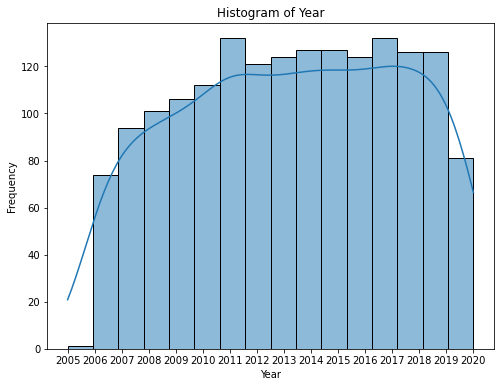

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(happ_df['year'],  bins=len(happ_df['year'].unique()), kde=True)
plt.xticks(happ_df['year'].unique())
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year')
plt.show()

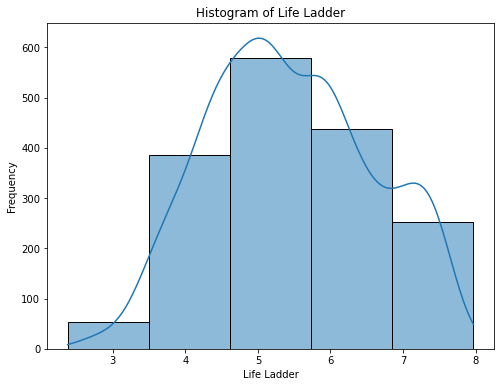

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(happ_df['Life Ladder'], bins=5, kde=True)
plt.xlabel('Life Ladder')
plt.ylabel('Frequency')
plt.title('Histogram of Life Ladder')
plt.show()

In [16]:
happ_df[(happ_df['Life Ladder']>=5) & (happ_df['Life Ladder']<6)].shape

(516, 11)

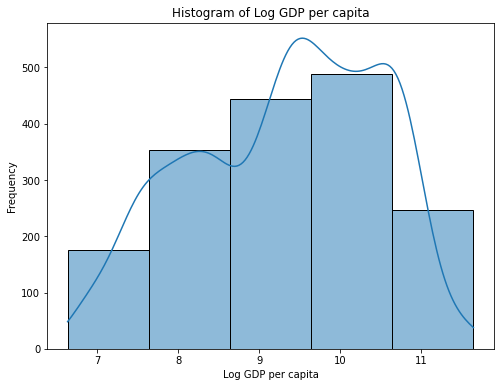

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(happ_df['Log GDP per capita'], bins=5, kde=True)
plt.xlabel('Log GDP per capita')
plt.ylabel('Frequency')
plt.title('Histogram of Log GDP per capita')
plt.show()

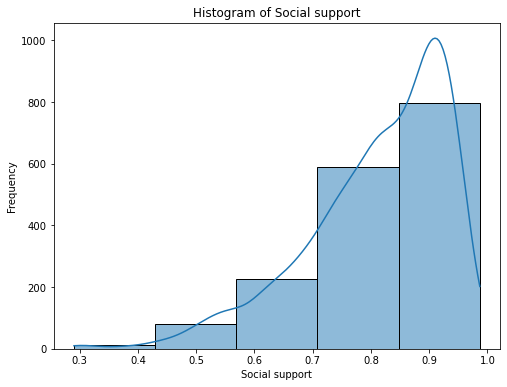

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(happ_df['Social support'], bins=5, kde=True)
plt.xlabel('Social support')
plt.ylabel('Frequency')
plt.title('Histogram of Social support')
plt.show()

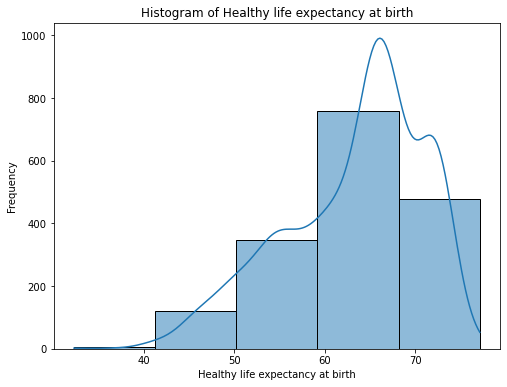

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(happ_df['Healthy life expectancy at birth'], bins=5, kde=True)
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Frequency')
plt.title('Histogram of Healthy life expectancy at birth')
plt.show()

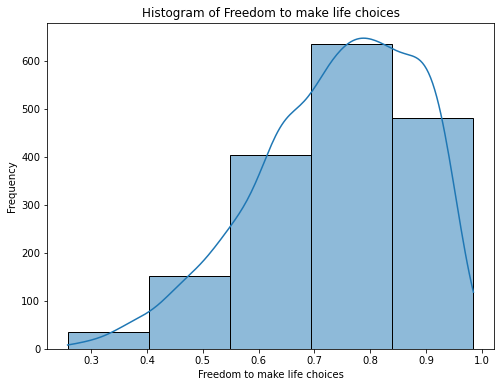

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(happ_df['Freedom to make life choices'], bins=5, kde=True)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Frequency')
plt.title('Histogram of Freedom to make life choices')
plt.show()

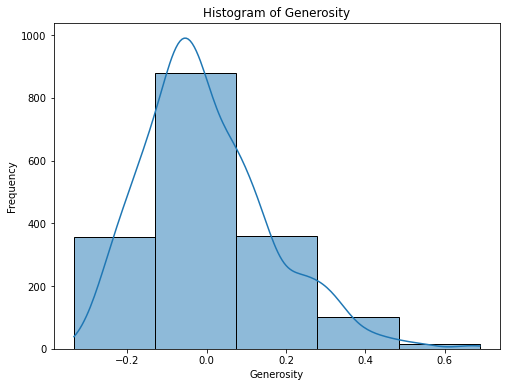

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(happ_df['Generosity'], bins=5, kde=True)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.title('Histogram of Generosity')
plt.show()

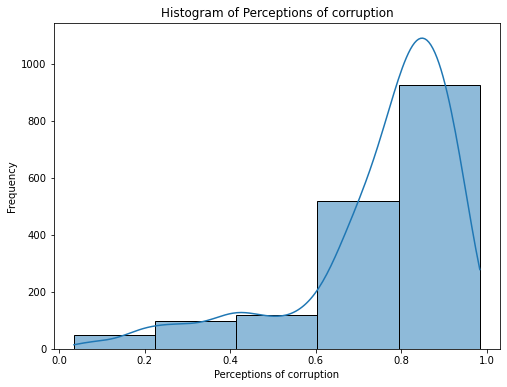

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(happ_df['Perceptions of corruption'], bins=5, kde=True)
plt.xlabel('Perceptions of corruption')
plt.ylabel('Frequency')
plt.title('Histogram of Perceptions of corruption')
plt.show()

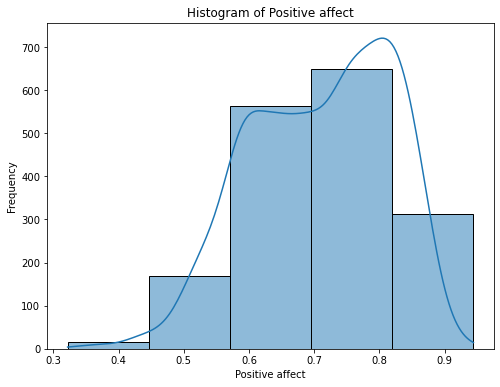

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(happ_df['Positive affect'], bins=5, kde=True)
plt.xlabel('Positive affect')
plt.ylabel('Frequency')
plt.title('Histogram of Positive affect')
plt.show()

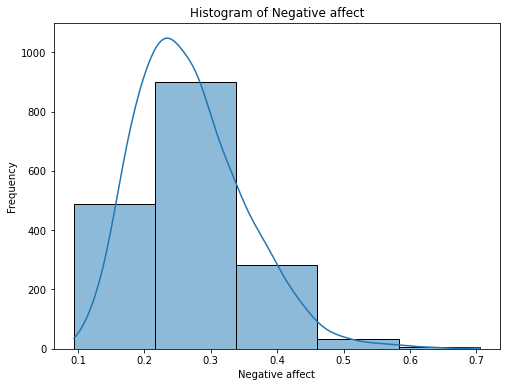

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(happ_df['Negative affect'], bins=5, kde=True)
plt.xlabel('Negative affect')
plt.ylabel('Frequency')
plt.title('Histogram of Negative affect')
plt.show()

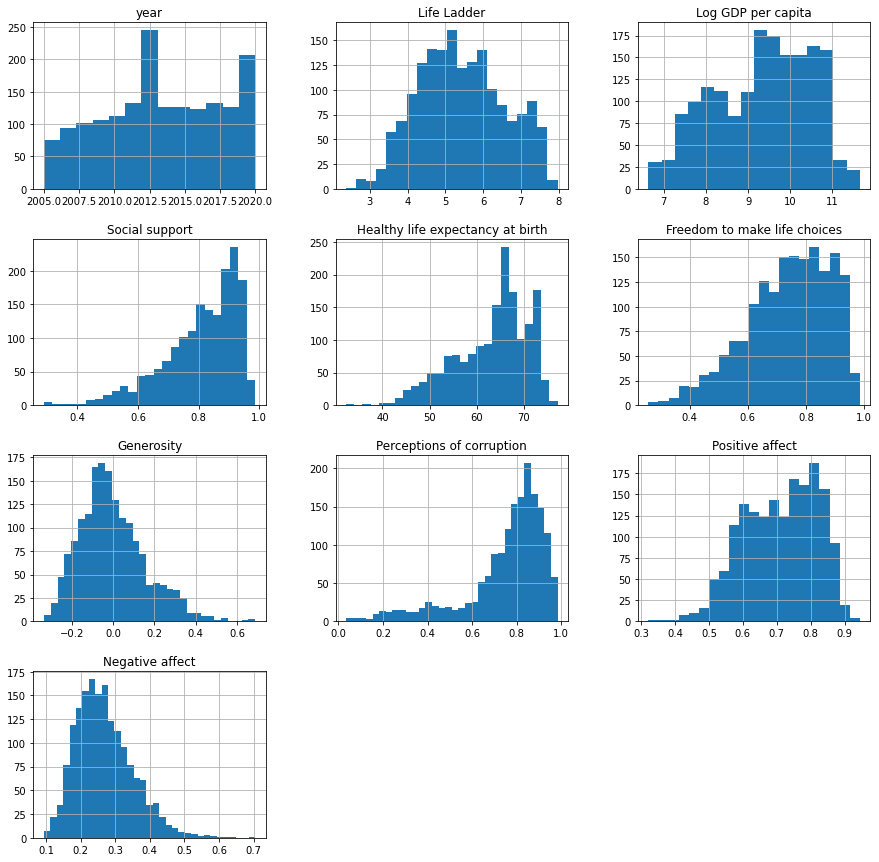

In [25]:
# subplots of histogram distribution of data attributes
happ_df.hist(bins='auto', figsize=(15,15));

<Figure size 1440x720 with 0 Axes>

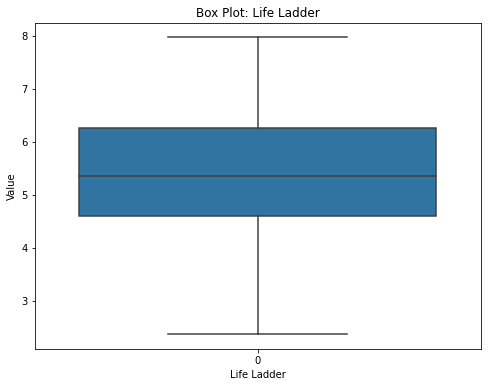

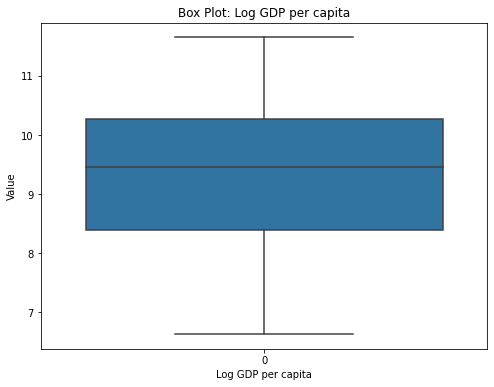

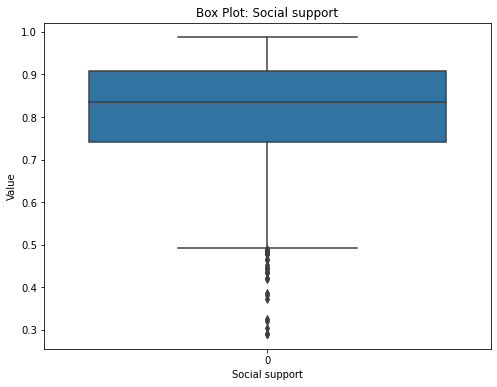

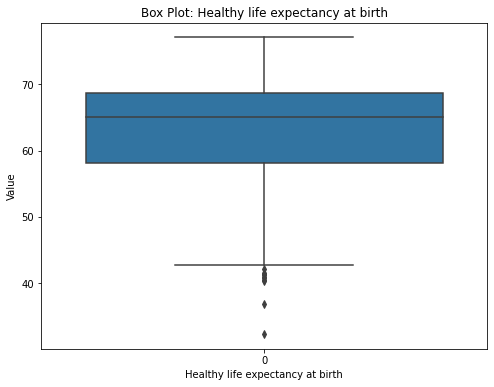

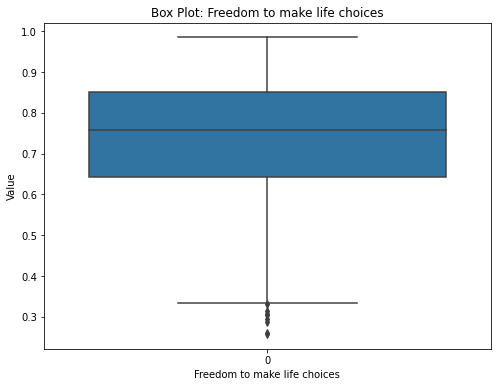

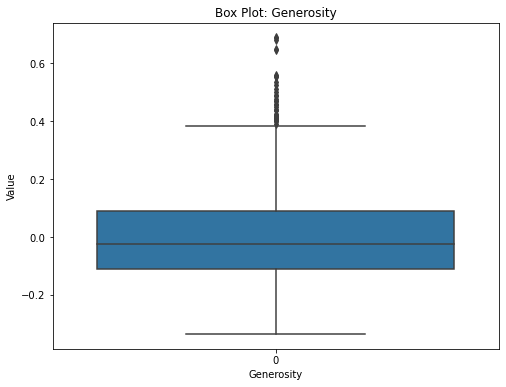

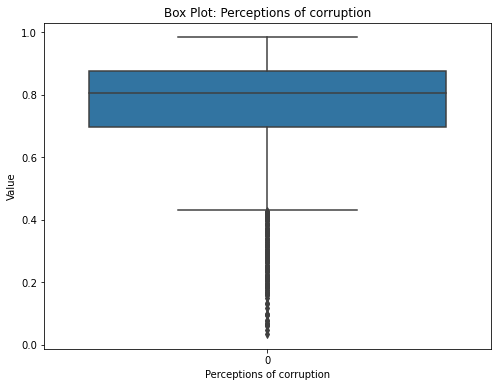

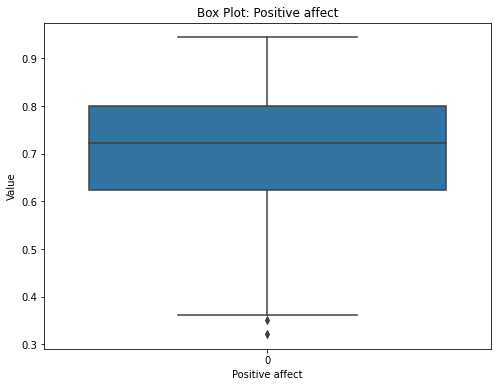

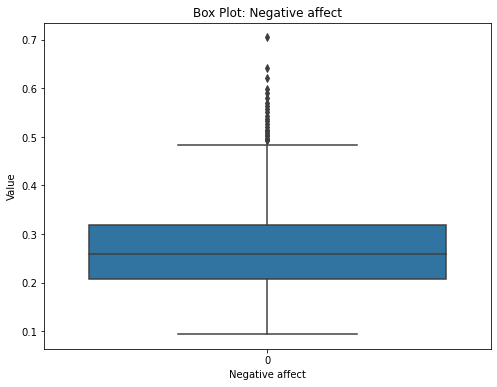

In [26]:
plt.figure(figsize=(20, 10))
cols = ['Life Ladder', 'Log GDP per capita', 'Social support',
        'Healthy life expectancy at birth', 'Freedom to make life choices',
        'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
for col in cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=happ_df[col], orient="vertical")
    plt.title(f'Box Plot: {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()

# Handling categorical attributes: label encoding

In [27]:
happ_enco_label = happ_df.copy()
label_encoder = LabelEncoder()
happ_enco_label['Country name'] = label_encoder.fit_transform(happ_df['Country name'])

In [28]:
happ_enco_label

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,0,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,0,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,0,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,0,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,154,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,154,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,154,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,154,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


# B: Solution

From the histogram of data attributes, we can see how distributed these values are, across the dataset. The histogram of attributes year and Life Ladder are normally distributed, while attributes like Social support,Healthy life expectancy at birth, Freedom to make life choices, Perceptions of corruption are left skewed and attributes like Generosity, and Negative effect are right skewed. Other attributes like Log GDP per capita and Postive effect are normal but slightly left skewed. The boxplot also shows the median of all the attributes and outliers if there are any. There are a few outliers in Social Support, Healthy life expectancy at birth, Freedom to make life choices, Perceptions of corruption, Generosity, and Negative effect features.

There a a few attributes which have missing values- Social support,Healthy life expectancy at birth, Freedom to make life choices, Perceptions of corruption , Generosity, and Negative effect, Log GDP per capita and Postive effect.These attributes do not need manual imputation(mean, median or mode) as the missing values are only 373, I decided to drop the missing or N/A values. Now, the number of rows after dropping missing rows is 1708.

There is a attribute that might require special treatment-
Since country name is a categorical attribute, we cannot compute its correlation and compare with other attributes. It is transformed into a numerical attribute by Label Encoding. Here, label encoding is chosen instead of other methods like one-hot, as label encoding will  not increase dimensionality of the data (no need to create different labels as in one-hot) and will benefit linear regression.

# C:

In [29]:
mat_cor = happ_enco_label.corr()

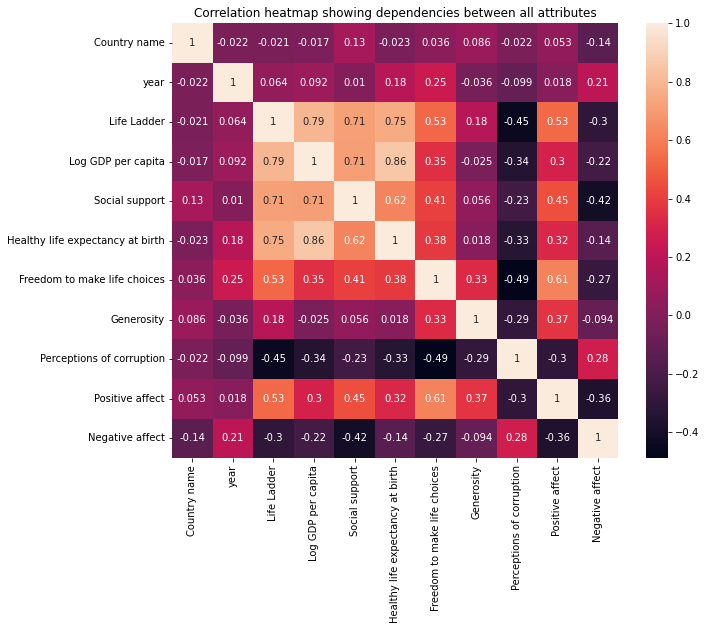

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(mat_cor, annot=True)
plt.title('Correlation heatmap showing dependencies between all attributes')
plt.show()

In [31]:
# pearson correlation table
pearson_corr = abs(mat_cor['Life Ladder']).sort_values(ascending=False)
pearson_corr

Life Ladder                         1.000000
Log GDP per capita                  0.792848
Healthy life expectancy at birth    0.754697
Social support                      0.713211
Positive affect                     0.533092
Freedom to make life choices        0.525089
Perceptions of corruption           0.448157
Negative affect                     0.300466
Generosity                          0.182758
year                                0.064080
Country name                        0.020984
Name: Life Ladder, dtype: float64

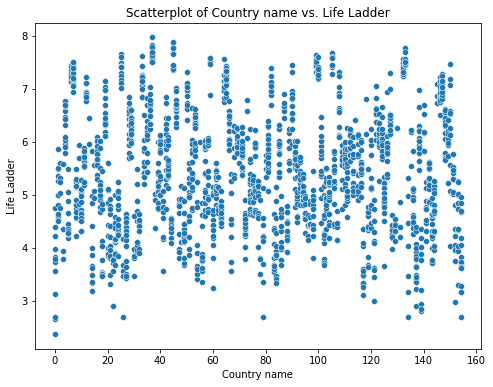

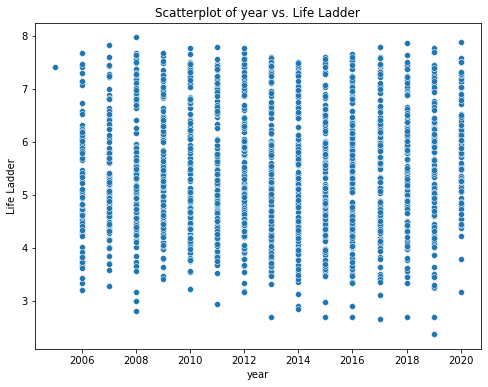

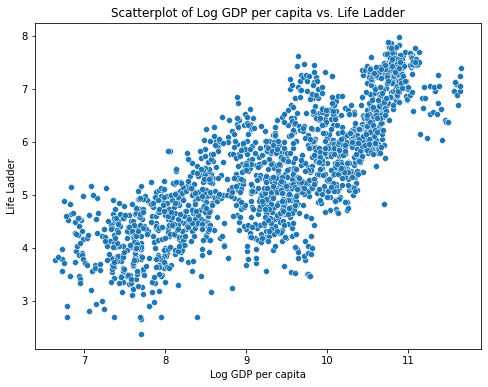

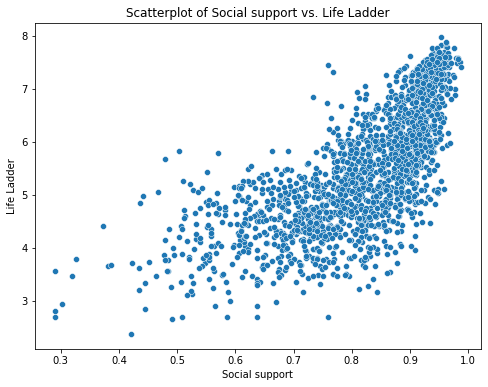

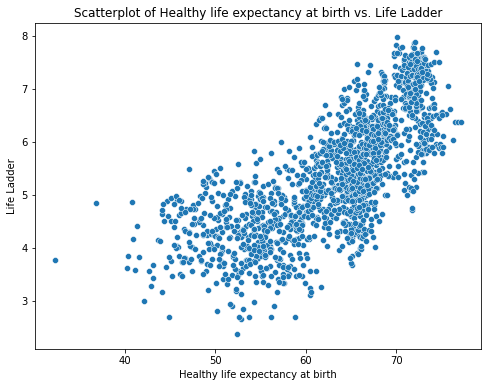

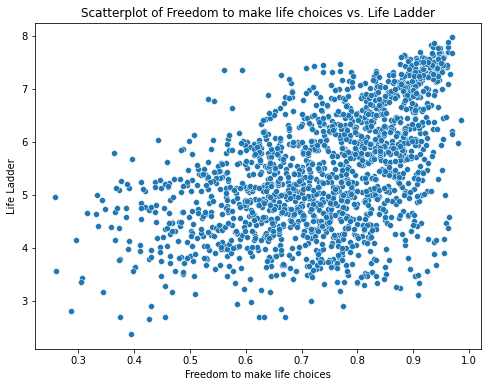

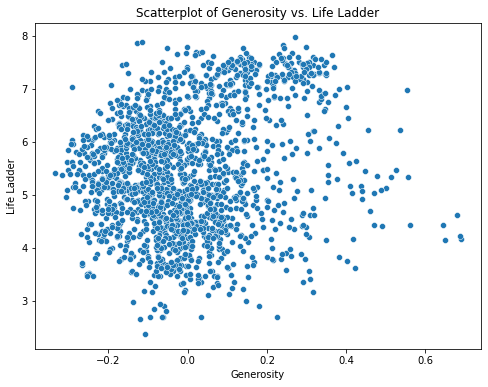

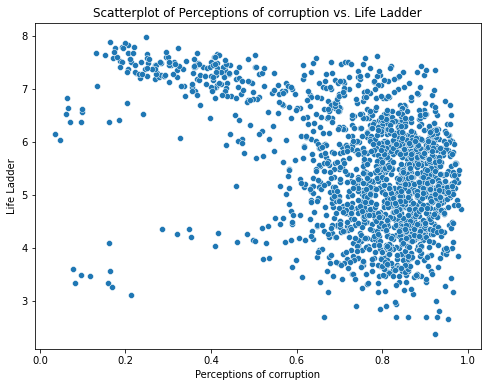

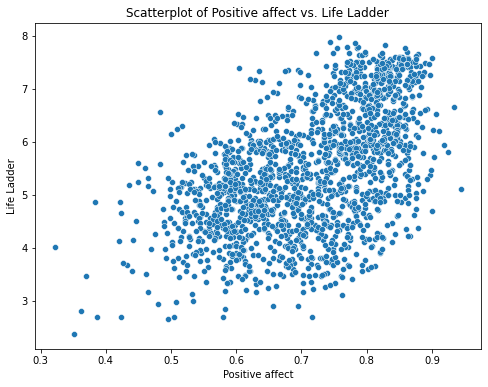

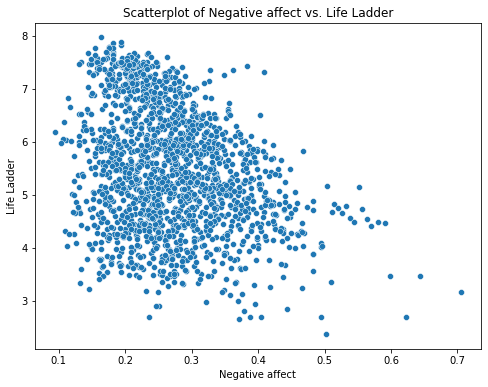

In [32]:
label = 'Life Ladder'
scat_vars = happ_enco_label.columns.tolist()
scat_vars.remove(label)

for attribute in scat_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=attribute, y=label, data=happ_enco_label)
    plt.title(f'Scatterplot of {attribute} vs. {label}')
    plt.xlabel(attribute)
    plt.ylabel(label)
    plt.show()

# C: Solution
The correlation heatmap shows the correlation between every attributes. The darker the color goes, the more correlated it is with another feature. From this we can analyse a few things:


1.  Log GDP per capita is highly correlated with Healthy life expectancy and Life ladder
2.   Healthy life expectancy and Life ladder are correlated
3.  Life ladder and Social support are also correlated
4. Freedom to make life choices and perception of corruption is also negatively correlated.

The scatterplots are a good way to show the relationships between two attributes visually: From scatter and PCC table,


1.   Life ladder is highly correlated with Log GDP per capita -0.792848
Healthy life expectancy at birth    0.754697,
Social support                      0.713211.Hence these features are important for model prediction.
2.   Life ladder has almost zero  correlation with year and country name:
year                                0.064080,
Country name                       -0.020984. Hence these features are not important for model prediction




# D:

In [33]:
happ_enco_label["Log GDP Cat"] = pd.cut(happ_enco_label["Log GDP per capita"], bins=[6.0, 7.0, 8.0, 9.0 ,10.0, np.inf], labels=[1, 2, 3, 4, 5])

In [34]:
happ_enco_label["Log GDP Cat"].value_counts()

5    566
4    522
3    328
2    253
1     39
Name: Log GDP Cat, dtype: int64

In [35]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in sss.split(happ_enco_label.drop(columns=['Life Ladder', 'year']), happ_enco_label['Log GDP Cat']):
    strat_train_set_n = happ_enco_label.iloc[train_index]
    strat_test_set_n = happ_enco_label.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [36]:
strat_train_set, strat_test_set = strat_splits[0]

In [37]:
def proportions(data):
    return data["Log GDP Cat"].value_counts() / len(data)

train_set, test_set = train_test_split(happ_enco_label, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": proportions(happ_enco_label),
    "Stratified %": proportions(strat_test_set),
    "Random %": proportions(test_set),
}).sort_index()
compare_props.index.name = "Log GDP Cat"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Log GDP Cat,,,,,
1,2.28,2.34,2.34,2.44,2.44
2,14.81,14.91,13.74,0.67,-7.22
3,19.20,19.30,22.51,0.49,17.24
4,30.56,30.41,31.58,-0.50,3.33
5,33.14,33.04,29.82,-0.29,-10.00


In [38]:
y_train = np.array(strat_train_set['Life Ladder'])
X_train = np.array(strat_train_set.drop(columns=['Life Ladder', 'year', 'Log GDP Cat']))

In [39]:
y_test = np.array(strat_test_set['Life Ladder'])
X_test = np.array(strat_test_set.drop(columns=['Life Ladder', 'year', 'Log GDP Cat']))

In [40]:
X_train.shape

(1366, 9)

# D Solution:

The Log GDP per capita attribute is highly correlated to Life Ladder from the correlation map and PCC table, hence I used this attribute as a variable to perform stratified splitting method. This sampling method takes the stratified samples of the data and spilts it as number of times as mentioned in the test size. Here I have mentioned 0.2, which means 20 percent of the data is being stratified shuffled and split from the whole population. To perform this, we should have categories of the splitting variable to handle the Stratifed shuffle split.

In a stratified sample, we divide a population into homogeneous subpopulations called strata  based on specific attributes of the data. Once the strata test and strata train data are obtained, we find the proportions of 'Log GDP cat' in the whole data and the samples obtained using various sampling methods. The table shows that in each label of Log GDP per capita, the overall population ratio,stratifed ratio, and error values are shown. The first row represents when the Log GDP per capita category is 1, we have the overall proportion of population as 2.28, the stratified proportion(sample test) is	2.34, by randominsing we get	2.34 and the stratied error is	2.44. From these values we say that, sample test set is representative of the population data. This can be verified using .describe tables too. We then create a training and testing sets, from stratas, and drop those columns which are least correlated such as year.

# E:

In [41]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train.shape

(1366, 9)

In [43]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8
count,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03,1.366000e+03
mean,1.577557e-16,-5.304850e-16,1.246954e-15,6.663370e-16,1.994500e-16,-2.844642e-18,-3.298159e-16,3.001910e-16,1.317679e-16
std,1.000366e+00,1.000366e+00,1.000366e+00,1.000366e+00,1.000366e+00,1.000366e+00,1.000366e+00,1.000366e+00,1.000366e+00
min,-1.726616e+00,-2.330128e+00,-4.303075e+00,-4.054847e+00,-3.373506e+00,-2.064188e+00,-3.872352e+00,-3.646681e+00,-2.118323e+00
25%,-8.534491e-01,-7.739697e-01,-5.780410e-01,-6.621551e-01,-6.385391e-01,-6.840487e-01,-2.679703e-01,-7.703113e-01,-7.404272e-01
50%,-2.671587e-03,1.096890e-01,2.041129e-01,2.443092e-01,1.273914e-01,-1.525084e-01,2.940323e-01,1.291397e-01,-1.421305e-01
75%,8.481059e-01,8.272823e-01,7.984674e-01,7.067108e-01,7.674155e-01,5.468867e-01,6.439330e-01,8.318358e-01,6.102729e-01
max,1.721272e+00,2.014455e+00,1.450606e+00,1.813593e+00,1.711713e+00,4.301861e+00,1.250518e+00,2.181012e+00,5.266713e+00


In [44]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,-0.026370,-0.001308,-0.039262,-0.019276,-0.029542,0.072371,-0.015979,-0.077998,0.011252
std,1.006897,1.022306,1.019800,1.034113,0.995542,1.036297,1.026005,1.064361,1.020863
min,-1.726616,-2.207855,-4.294820,-2.940367,-3.170656,-1.890117,-3.715640,-3.271910,-1.876587
25%,-0.887032,-0.846379,-0.600742,-0.690973,-0.738215,-0.621880,-0.384154,-0.971751,-0.710210
50%,-0.047449,0.145677,0.154583,0.210251,0.053946,-0.105882,0.288628,-0.067615,-0.111914
75%,0.848106,0.811673,0.773703,0.739459,0.858348,0.647910,0.715534,0.890394,0.570991
max,1.721272,2.017056,1.417587,1.598766,1.550833,4.295644,1.218094,2.087320,4.263509


Linear Model using K-Fold with Normal form or SVD

In [45]:
svd_lr = LinearRegression()
svd_lr.fit(X_train, y_train)

LinearRegression()

In [46]:
# mean sqaured error
cross_val_svd = cross_val_score(svd_lr, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
cross_val_svd

array([-0.32058656, -0.30681853, -0.30817785, -0.26957579])

In [47]:
# average of mse
svd_rmse = np.sqrt(-cross_val_svd.mean())
svd_rmse

0.5488986095622458

In [48]:
# r2 score
cross_val_score(svd_lr, X_train, y_train, cv=4, scoring="r2")

array([0.76393958, 0.75890024, 0.7398327 , 0.7995232 ])

Stochastic Gradient Descent

In [49]:
sgd_lr= SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_lr.fit(X_train, y_train.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [50]:
# mean squared error
cross_val_sgd = cross_val_score(sgd_lr, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
cross_val_sgd

array([-0.32042546, -0.30633131, -0.30826553, -0.2698453 ])

In [51]:
# average of mse
sgd_rmse = np.sqrt(-cross_val_sgd.mean())
sgd_rmse

0.5488323068130345

In [52]:
# r2 score
cross_val_score(sgd_lr, X_train, y_train, cv=4, scoring="r2")

array([0.7640582 , 0.75928311, 0.73975868, 0.79932277])

# Regularization for SVD or closed form solution

Ridge

In [53]:
alp_val = [0.1, 1.0, 100.0]

In [54]:
r_rmse = list()
for a in alp_val:
    r = Ridge(alpha=a, solver="cholesky")
    ridge_cross = cross_val_score(r, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    r_rmse.append(np.sqrt(-ridge_cross.mean()))

In [55]:
ridge_cross

array([-0.32574669, -0.30375201, -0.30907876, -0.26902696])

In [56]:
r_rmse

[0.5488965920877034, 0.548878842827492, 0.5494552797154127]

Lasso

In [57]:
l_rmse = list()
for a in alp_val:
    l= Lasso(alpha=a)
    lasso_cross = cross_val_score(l, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    l_rmse.append(np.sqrt(-lasso_cross.mean()))

In [58]:
lasso_cross

array([-1.37928256, -1.27522123, -1.20721126, -1.34686841])

In [59]:
l_rmse

[0.5735136640389269, 1.141116061215057, 1.141116061215057]

Elastic Net

In [60]:
e_rmse = list()
for a in alp_val:
    e = ElasticNet(alpha=a, l1_ratio=0.5)
    elasticnet_cross = cross_val_score(e, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    e_rmse.append(np.sqrt(-elasticnet_cross.mean()))

In [61]:
e_rmse

[0.5584286262569396, 0.8852899374172268, 1.141116061215057]

In [62]:
elasticnet_cross

array([-1.37928256, -1.27522123, -1.20721126, -1.34686841])

# Regularization for Stocastic gradient descent

Ridge

In [63]:
alpha_val = [0.1,10.0,100.0]

In [64]:
cross_val_sgd_r=list()
sgd_rmse_r =list()
for a in alpha_val:
  sgd_ridge = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l2', alpha= a, random_state=42)
  cross_val_sgd_r= cross_val_score(sgd_ridge, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_r.append(np.sqrt(-cross_val_sgd_r.mean()))

In [65]:
cross_val_sgd_r

array([-1.33411064, -1.218287  , -1.16198102, -1.30056804])

In [66]:
sgd_rmse_r

[0.5497699791916095, 0.9261696589596563, 1.1197038350326147]

Lasso

In [67]:
cross_val_sgd_l=list()
sgd_rmse_l =list()
for a in alpha_val:
  sgd_lasso = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l1', alpha= a, random_state=42)
  cross_val_sgd_l= cross_val_score(sgd_lasso, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_l.append(np.sqrt(-cross_val_sgd_l.mean()))

In [68]:
cross_val_sgd_l

array([-1.38311853, -1.27582026, -1.20741488, -1.34611385])

In [69]:
sgd_rmse_l

[0.5715578245350552, 1.1415414496661977, 1.1415414496662921]

Elastic net

In [70]:
cross_val_sgd_e=list()
sgd_rmse_e =list()
for a in alpha_val:
  sgd_elastic = SGDRegressor(max_iter=1000, tol=1e-5, penalty='elasticnet', alpha= a, l1_ratio = 0.5,random_state=42)
  cross_val_sgd_e= cross_val_score(sgd_elastic, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_e.append(np.sqrt(-cross_val_sgd_e.mean()))

In [71]:
cross_val_sgd_e

array([-1.38311853, -1.27582026, -1.20741488, -1.34611385])

In [72]:
sgd_rmse_e

[0.5588149126328875, 1.1415414496664633, 1.1415414496662921]

# Trying different values of learning rate and batch size

Ridge

In [73]:
eta= [0.01, 1,10]

In [74]:
cross_val_sgd_r=list()
sgd_rmse_r =list()
for etas in eta:
  sgd_ridge = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l2', eta0= etas, learning_rate='invscaling', random_state=42)
  cross_val_sgd_r= cross_val_score(sgd_ridge, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_r.append(np.sqrt(-cross_val_sgd_r.mean()))

In [75]:
sgd_rmse_r

[0.5492446058576791, 0.8267336484958941, 3168248543869.8867]

In [76]:
n_epochs = 1
batch_sizes = [1,10,1000,10000]
sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_ridge = SGDRegressor(
        max_iter=1, tol=1e-5, penalty='l2', eta0=0.01, learning_rate='adaptive', random_state=42,warm_start=True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train), batch_size):
            X_batch = X_train[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_ridge.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_ridge, X_train, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_ridge.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes:")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")


RMSE values for different batch sizes:
Batch Size=1: RMSE=0.5694307276564275
Batch Size=10: RMSE=0.5694310536696393
Batch Size=1000: RMSE=0.5694097301473144
Batch Size=10000: RMSE=0.5694283085130143


Lasso

In [77]:
cross_val_sgd_l=list()
sgd_rmse_l =list()
for etas in eta:
  sgd_lasso = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l1', eta0= etas, learning_rate='invscaling', random_state=42)
  cross_val_sgd_l= cross_val_score(sgd_lasso, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_l.append(np.sqrt(-cross_val_sgd_l.mean()))

In [78]:
sgd_rmse_l

[0.5492642367564081, 0.6473971564146301, 3388226957614.5107]

In [79]:
n_epochs = 1
batch_sizes = [1,10,1000,10000]
sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_lasso = SGDRegressor(
        max_iter=1, tol=1e-5, penalty='l1', eta0=0.01, learning_rate='adaptive', random_state=42, warm_start = True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train), batch_size):
            X_batch = X_train[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_lasso.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_lasso, X_train, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_lasso.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes:")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")

RMSE values for different batch sizes:
Batch Size=1: RMSE=0.5693814112522656
Batch Size=10: RMSE=0.5693817336949687
Batch Size=1000: RMSE=0.5693603126851523
Batch Size=10000: RMSE=0.5693785340181973


Elastic net

In [80]:
cross_val_sgd_e=list()
sgd_rmse_e =list()
for etas in eta:
  sgd_elastic = SGDRegressor(max_iter=1000, tol=1e-5, penalty='elasticnet', l1_ratio = 0.5, eta0= etas, learning_rate='invscaling',random_state=42)
  cross_val_sgd_e= cross_val_score(sgd_elastic, X_train, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_e.append(np.sqrt(-cross_val_sgd_e.mean()))

In [81]:
sgd_rmse_e

[0.5492547678394611, 0.6614351641795674, 3018850626440.9746]

In [82]:
n_epochs = 1
batch_sizes = [1,10,1000,10000]
sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_elastic = SGDRegressor(
        max_iter=1, tol=1e-5, penalty='elasticnet',l1_ratio = 0.5,  eta0=0.01, learning_rate='adaptive', random_state=42,warm_start=True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train), batch_size):
            X_batch = X_train[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_elastic.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_elastic, X_train, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_elastic.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes:")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")

RMSE values for different batch sizes:
Batch Size=1: RMSE=0.5694065370536371
Batch Size=10: RMSE=0.569406868930962
Batch Size=1000: RMSE=0.5693852831080536
Batch Size=10000: RMSE=0.5694037582273294


Visualize the training and validation loss

In [83]:
losses_train=list()
mse_train=list()
losses_val=list()
mse_val=list()
n_iter =100
for epoch in range(1,n_iter+1):
  sgd_lr = SGDRegressor(max_iter=epoch, tol=1e-5, penalty=None, eta0=0.01,random_state=42)
  sgd_lr.fit(X_train, y_train.ravel())
  y_pred = sgd_lr.predict(X_train)
  for i in range(0,len(y_train)):
    losses_train.append(0.5*((np.array(y_train)[i] - y_pred[i])**2))
  mse_train.append(np.sqrt(np.mean(losses_train)))

  y_pred_val = sgd_lr.predict(X_test)
  for i in range(0,len(y_test)):
    losses_val.append(0.5*((np.array(y_test)[i] - y_pred_val[i])**2))
  mse_val.append(np.sqrt(np.mean(losses_val)))

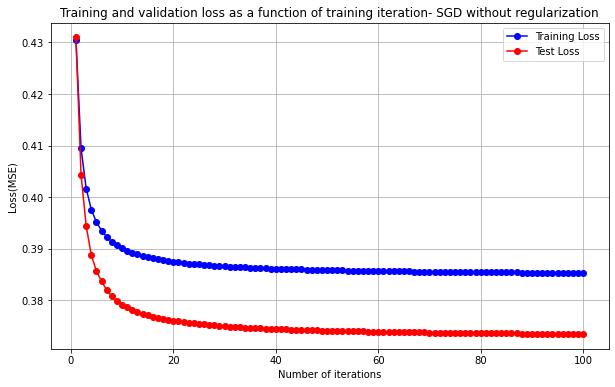

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,n_iter+1), mse_train, label='Training Loss', marker='o', linestyle='-', color='blue')
plt.plot(range(1,n_iter+1), mse_val, label='Test Loss', marker='o', linestyle='-', color='red')
plt.xlabel('Number of iterations')
plt.ylabel('Loss(MSE)')
plt.title('Training and validation loss as a function of training iteration- SGD without regularization')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
losses_train=list()
mse_train=list()
losses_val=list()
mse_val=list()
n_iter =100
for epoch in range(1,n_iter+1):
  sgd_elastic = SGDRegressor(max_iter=epoch, tol=1e-5, penalty='elasticnet',alpha=0.01 ,random_state=42)
  sgd_elastic.fit(X_train, y_train.ravel())
  y_pred = sgd_elastic.predict(X_train)
  for i in range(0,len(y_train)):
    losses_train.append(0.5*((np.array(y_train)[i] - y_pred[i])**2))
  mse_train.append(np.sqrt(np.mean(losses_train)))

  y_pred_val = sgd_elastic.predict(X_test)
  for i in range(0,len(y_test)):
    losses_val.append(0.5*((np.array(y_test)[i] - y_pred_val[i])**2))
  mse_val.append(np.sqrt(np.mean(losses_val)))

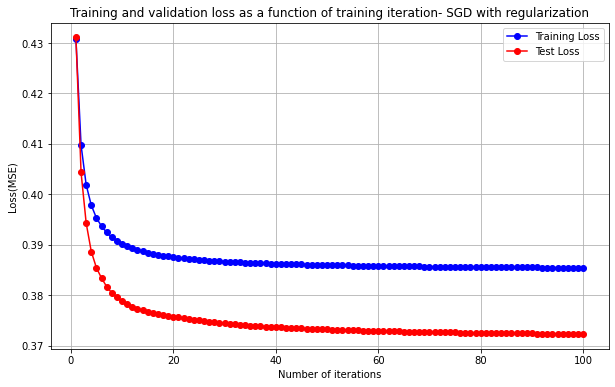

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,n_iter+1), mse_train, label='Training Loss', marker='o', linestyle='-', color='blue')
plt.plot(range(1,n_iter+1), mse_val, label='Test Loss', marker='o', linestyle='-', color='red')
plt.xlabel('Number of iterations')
plt.ylabel('Loss(MSE)')
plt.title('Training and validation loss as a function of training iteration- SGD with regularization')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
mse_val[-1]

0.3723345020663445

# E: Solution

Initially before passing to the model, the data is standard scaled to make it normalised. The SVD or normal equation LR model gives RMSE of 0.5488986095622458.While the rmse of stochastic Gradient descent is almost similar 0.5488323068130345.

We apply closed form SVD regularisation to check if the model is overfitting, after applying ridge, lasso and elasticnet methods, we find that Ridge gives the lowest RMSE when compared to other two regularisation across different learning rates. As we increase the learning rates, the error increase for ridge,lasso and elastic net.

I also applied SGDregressor with regularisation and see that, ridge gives rmse of 0.5497699791916096, and is the lowest when compared to other two methods. As we increase the learning rates  regularisation factor alpha, the error increases for Ridge and lasso but we can observe a slight increase and then decrease in error for elasticnet. This is observed because in higher alpha values, lasso eliminates the weights of least important features i.e some features are irrelevent and removing such features improves rmse in elasticnet due to lasso effect.

If we increase the  learning rate eta for ridge, lasso and elastic net the error increases immensely. If we increase the batch size, there is slight decrease in rmse values of ridge lasso and elastic net but we cannot observe signicant decrease, and when the batch size reaches to a value more than the number of the data points(rows), then we are essentially performing batch gradient descent and not mini batch gradient and hence this converges to the global minimum and we get lower rmse values. With Stochastic and Mini-batch Gradient Descent, the curves/values are not so
smooth/easy to analyse, and it may be hard to know whether you have reached the
minimum or not.

From the training and validation losses graphs, we observe that the training loss is more than the test loss, this means the model is optimal. We use regularization ti improve the test loss even better.We have chosen elasticnet here as it constrains the weights of the model by eliminating least important features, hence reducing the gap between the losses and reducing the loss due to lasso effect. But we observe that regularisation reduced the gap between training and testing loss slightlty.This means the model test loss is reduced with regularization and made it even better. If we used a much larger training set,
however, the two curves would continue to
get closer.

# F

Polynomial Regression

In [88]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [89]:
# Linear Model using K-Fold with Normal form or SVD

svd_lr = LinearRegression()
svd_lr.fit(X_train_poly, y_train)

# mean sqaured error
cross_val_svd = cross_val_score(svd_lr, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
# average of mse
svd_rmse = np.sqrt(-cross_val_svd.mean())
svd_rmse

0.4931258839731967

In [90]:
svd_lr.intercept_, svd_lr.coef_

(5.5036455737153505,
 array([-0.04514146,  0.34037964,  0.35548766,  0.27099905,  0.00766218,
         0.0676599 , -0.17018236,  0.16602176,  0.00349477, -0.0465529 ,
         0.22893138, -0.04386401, -0.17225987,  0.01537733, -0.0323283 ,
         0.0229568 , -0.06059311, -0.03345959,  0.02011952, -0.13468389,
         0.01734968, -0.15099422,  0.15313211,  0.03944241,  0.11656206,
        -0.07404835,  0.06598283,  0.14855157,  0.07456907,  0.02526564,
        -0.09947794, -0.05731202,  0.05316568, -0.01142991,  0.0849704 ,
        -0.10843803,  0.00745868, -0.01767522, -0.01337885, -0.0412345 ,
        -0.04863272, -0.06432682, -0.02428861, -0.05952501, -0.01933607,
        -0.003123  , -0.02789513, -0.02590186, -0.04887643,  0.00800806,
        -0.06539703,  0.0295892 ,  0.07193446,  0.00870824]))

In [91]:
#Stochastic Gradient descent

sgd_lr= SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_lr.fit(X_train_poly, y_train.ravel())
# mean sqaured error
cross_val_sgd = cross_val_score(sgd_lr, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
# average of mse
sgd_rmse = np.sqrt(-cross_val_sgd.mean())
sgd_rmse

0.4950144705642259

Regularization

In [92]:
alp_val = [0.1, 1.0, 100.0]
# ridge

r_rmse = list()
for a in alp_val:
    r = Ridge(alpha=a, solver="cholesky")
    ridge_cross = cross_val_score(r, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    r_rmse.append(np.sqrt(-ridge_cross.mean()))

#lasso
l_rmse = list()
for a in alp_val:
    l= Lasso(alpha=a)
    lasso_cross = cross_val_score(l, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    l_rmse.append(np.sqrt(-lasso_cross.mean()))

# elasticnet

e_rmse = list()
for a in alp_val:
    e = ElasticNet(alpha=a, l1_ratio=0.5)
    elasticnet_cross = cross_val_score(e, X_train_poly, y_train, cv=4, scoring='neg_mean_squared_error')
    e_rmse.append(np.sqrt(-elasticnet_cross.mean()))


In [93]:
print(f'Ridge rmse:',r_rmse)
print(f'Lasso rmse:',l_rmse)
print(f'Elastic net rmse:',e_rmse)

Ridge rmse: [0.49310338987528335, 0.4929109464802151, 0.4948147295592066]
Lasso rmse: [0.5595252170327106, 1.141116061215057, 1.141116061215057]
Elastic net rmse: [0.5308952782985139, 0.8802987108951605, 1.141116061215057]


Regularization with Stochastic gradient descent

In [94]:
alpha_val = [0.1,10.0,100.0]

#ridge
cross_val_sgd_r=list()
sgd_rmse_r =list()
for a in alpha_val:
  sgd_ridge = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l2', alpha= a, random_state=42)
  cross_val_sgd_r= cross_val_score(sgd_ridge, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_r.append(np.sqrt(-cross_val_sgd_r.mean()))

#lasso
cross_val_sgd_l=list()
sgd_rmse_l =list()
for a in alpha_val:
  sgd_lasso = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l1', alpha= a, random_state=42)
  cross_val_sgd_l= cross_val_score(sgd_lasso, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_l.append(np.sqrt(-cross_val_sgd_l.mean()))

#elastic net
cross_val_sgd_e=list()
sgd_rmse_e =list()
for a in alpha_val:
  sgd_elastic = SGDRegressor(max_iter=1000, tol=1e-5, penalty='elasticnet', alpha= a, l1_ratio = 0.5,random_state=42)
  cross_val_sgd_e= cross_val_score(sgd_elastic, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_e.append(np.sqrt(-cross_val_sgd_e.mean()))

In [95]:
print(f'Ridge rmse:',sgd_rmse_r)
print(f'Lasso rmse:',sgd_rmse_l)
print(f'Elastic net rmse:',sgd_rmse_e)

Ridge rmse: [0.4959358740569504, 0.8635009236098352, 1.0842826575110915]
Lasso rmse: [0.5790376213160549, 1.1415414496559124, 1.1415414496662921]
Elastic net rmse: [0.5416154106458198, 1.141541449548719, 1.1415414496662921]


# Trying different values of learning rate and batch size for ploynomial regression

In [96]:
# ridge

eta= [0.01, 1 , 10]

cross_val_sgd_r=list()
sgd_rmse_r =list()
for etas in eta:
  sgd_ridge = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l2', eta0= etas, learning_rate='invscaling', random_state=42)
  cross_val_sgd_r= cross_val_score(sgd_ridge, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_r.append(np.sqrt(-cross_val_sgd_r.mean()))

#lasso
cross_val_sgd_l=list()
sgd_rmse_l =list()
for etas in eta:
  sgd_lasso = SGDRegressor(max_iter=1000, tol=1e-5, penalty='l1', eta0= etas, learning_rate='invscaling', random_state=42)
  cross_val_sgd_l= cross_val_score(sgd_lasso, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_l.append(np.sqrt(-cross_val_sgd_l.mean()))

# elastic net
cross_val_sgd_e=list()
sgd_rmse_e =list()
for etas in eta:
  sgd_elastic = SGDRegressor(max_iter=1000, tol=1e-5, penalty='elasticnet', l1_ratio = 0.5, eta0= etas, learning_rate='invscaling',random_state=42)
  cross_val_sgd_e= cross_val_score(sgd_elastic, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error")
  sgd_rmse_e.append(np.sqrt(-cross_val_sgd_e.mean()))



In [97]:
print(f'Ridge rmse:',sgd_rmse_r)
print(f'Lasso rmse:',sgd_rmse_l)
print(f'Elastic net rmse:',sgd_rmse_e)

Ridge rmse: [0.503869128327368, 4331416368993.171, 37922964624915.69]
Lasso rmse: [0.5024210456723358, 3836325281897.5713, 42059261455066.93]
Elastic net rmse: [0.5024852629491567, 3487699815900.3896, 49564201092520.27]


In [98]:
n_epochs = 1
batch_sizes = [1,10,1000,10000]
sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_ridge = SGDRegressor(
        max_iter=1, tol=1e-5, penalty='l2', eta0=0.01, learning_rate='adaptive', random_state=42,warm_start=True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train_poly), batch_size):
            X_batch = X_train_poly[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_ridge.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_ridge, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_ridge.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes ridge :")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")

sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_lasso = SGDRegressor(
        max_iter=1, tol=1e-5, penalty='l1', eta0=0.01, learning_rate='adaptive', random_state=42, warm_start = True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train_poly), batch_size):
            X_batch = X_train_poly[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_lasso.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_lasso, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_lasso.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes lasso:")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")

sgd_rmse_batch = []
for batch_size in batch_sizes:
    sgd_elastic = SGDRegressor(
        max_iter=1, tol=1e-5, penalty='elasticnet',l1_ratio = 0.5,  eta0=0.01, learning_rate='adaptive', random_state=42,warm_start=True)
    for _ in range(n_epochs):
        for j in range(0, len(X_train_poly), batch_size):
            X_batch = X_train_poly[j : j + batch_size]
            y_batch = y_train[j : j + batch_size]
            sgd_elastic.partial_fit(X_batch, y_batch)
    cross_val_sgd_r = cross_val_score(
        sgd_elastic, X_train_poly, y_train, cv=4, scoring="neg_mean_squared_error",fit_params = {'coef_init':sgd_elastic.coef_})
    sgd_rmse_batch.append(np.sqrt(-cross_val_sgd_r.mean()))
print("RMSE values for different batch sizes elastic net:")
for i, batch_size in enumerate(batch_sizes):
    print(f"Batch Size={batch_size}: RMSE={sgd_rmse_batch[i]}")


RMSE values for different batch sizes ridge :
Batch Size=1: RMSE=17808974.31193241
Batch Size=10: RMSE=654282.8109572554
Batch Size=1000: RMSE=173283.35051101114
Batch Size=10000: RMSE=164846.6178215674
RMSE values for different batch sizes lasso:
Batch Size=1: RMSE=17896482.376665346
Batch Size=10: RMSE=655001.7402551178
Batch Size=1000: RMSE=167746.33616110907
Batch Size=10000: RMSE=162779.1693717901
RMSE values for different batch sizes elastic net:
Batch Size=1: RMSE=17852673.800414003
Batch Size=10: RMSE=654648.1356510969
Batch Size=1000: RMSE=170531.53148939222
Batch Size=10000: RMSE=163813.12222702403


Visualize the training and validation loss

In [99]:
losses_train=list()
mse_train=list()
losses_val=list()
mse_val=list()
n_iter =100
for epoch in range(1,n_iter+1):
  sgd_lr = SGDRegressor(max_iter=epoch, tol=1e-5, penalty=None, eta0=0.01,random_state=42)
  sgd_lr.fit(X_train_poly, y_train.ravel())
  y_pred = sgd_lr.predict(X_train_poly)
  for i in range(0,len(y_train)):
    losses_train.append(0.5*((np.array(y_train)[i] - y_pred[i])**2))
  mse_train.append(np.sqrt(np.mean(losses_train)))

  y_pred_val = sgd_lr.predict(X_test_poly)
  for i in range(0,len(y_test)):
    losses_val.append(0.5*((np.array(y_test)[i] - y_pred_val[i])**2))
  mse_val.append(np.sqrt(np.mean(losses_val)))

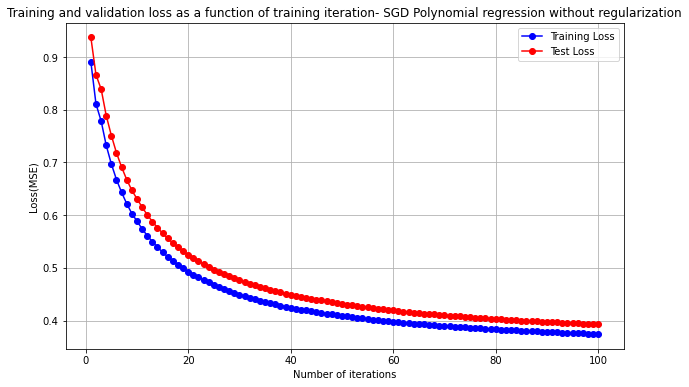

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,n_iter+1), mse_train, label='Training Loss', marker='o', linestyle='-', color='blue')
plt.plot(range(1,n_iter+1), mse_val, label='Test Loss', marker='o', linestyle='-', color='red')
plt.xlabel('Number of iterations')
plt.ylabel('Loss(MSE)')
plt.title('Training and validation loss as a function of training iteration- SGD Polynomial regression without regularization')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
losses_train=list()
mse_train=list()
losses_val=list()
mse_val=list()
n_iter =100
for epoch in range(1,n_iter+1):
  sgd_elastic = SGDRegressor(max_iter=epoch, tol=1e-5, penalty='elasticnet',alpha=0.1 ,random_state=42)
  sgd_elastic.fit(X_train_poly, y_train.ravel())
  y_pred = sgd_elastic.predict(X_train_poly)
  for i in range(0,len(y_train)):
    losses_train.append(0.5*((np.array(y_train)[i] - y_pred[i])**2))
  mse_train.append(np.sqrt(np.mean(losses_train)))

  y_pred_val = sgd_elastic.predict(X_test_poly)
  for i in range(0,len(y_test)):
    losses_val.append(0.5*((np.array(y_test)[i] - y_pred_val[i])**2))
  mse_val.append(np.sqrt(np.mean(losses_val)))

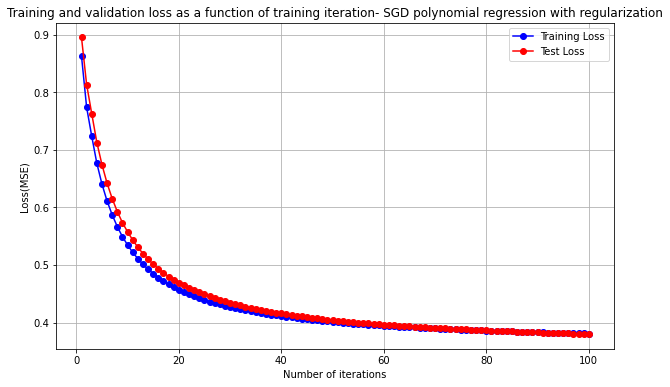

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,n_iter+1), mse_train, label='Training Loss', marker='o', linestyle='-', color='blue')
plt.plot(range(1,n_iter+1), mse_val, label='Test Loss', marker='o', linestyle='-', color='red')
plt.xlabel('Number of iterations')
plt.ylabel('Loss(MSE)')
plt.title('Training and validation loss as a function of training iteration- SGD polynomial regression with regularization')
plt.legend()
plt.grid(True)
plt.show()

# F: Solution

Initially before passing to the model, the data is made as 2nd degree polynomial features. The SVD or normal equation LR model gives RMSE of 0.4931258839731968.While the rmse of stochastic Gradient descent is almost similar and  higher, 0.49501447056422593.

We apply closed form SVD regularisation to check if the model is overfitting, after applying ridge, lasso and elasticnet methods, we find that Ridge gives the lowest RMSE when compared to other two regularisation across different learning rates. As we increase the learning rates, the error decreases and increases for ridge, increases for both lasso and elastic net.

I also applied SGDregressor with regularisation and see that, ridge gives rmse of 0.4959358740569504, and is the lowest when comapred to other two methods. As we increase the learning rates regularisation factor alpha, the error increases for Ridge and lasso and elasticnet.

If we increase the  learning rate eta for ridge, lasso and elastic net the error increases immensely. If we increase the batch size, there is slight decrease in rmse values of ridge lasso and elastic net, and when the batch size reaches to a value more than the number of the data points(rows), then we are essentially performing batch gradient descent and not mini batch gradient and hence this converges to the global minimum and we get lower rmse values. With Stochastic and Mini-batch Gradient Descent, the curves/values are not so
smooth/easy to analyse, and it may be hard to know whether you have reached the
minimum or not.

From the training and validation losses graphs, we observe that the training loss is less than the test loss, and there is a no significant gap in between the losses, this means that the model is not overfitting/underfitting the data since the training and test losses are also less. After regularisation, the train and test loss are almost similar along the same curve.

# G:

In [103]:
losses_train=list()
mse_train=list()
losses_val=list()
mse_val=list()
sgd_elastic = SGDRegressor(max_iter=100, tol=1e-5, penalty='elasticnet',alpha=0.01 ,random_state=42)
sgd_elastic.fit(X_train, y_train.ravel())
y_pred = sgd_elastic.predict(X_train)
for i in range(0,len(y_train)):
  losses_train.append(0.5*((np.array(y_train)[i] - y_pred[i])**2))
mse_train.append(np.sqrt(np.mean(losses_train)))

y_pred_val = sgd_elastic.predict(X_test)
for i in range(0,len(y_test)):
  losses_val.append(0.5*((np.array(y_test)[i] - y_pred_val[i])**2))
mse_val.append(np.sqrt(np.mean(losses_val)))

In [104]:
# predictions on test set
y_pred_val

array([5.53055606, 5.10661844, 4.58753441, 5.67245397, 7.11518227,
       5.05059185, 4.4770095 , 7.1256129 , 5.27250443, 5.01205235,
       6.01610302, 4.60810034, 7.23804138, 2.90709421, 6.66749504,
       5.75866996, 5.32405587, 3.80830096, 5.06824626, 5.12133595,
       6.14052564, 6.56360805, 6.02438963, 5.70159806, 5.26359833,
       5.36514821, 7.19960437, 4.36034386, 5.80457868, 4.60032599,
       7.2073861 , 5.45400887, 6.86615383, 6.4012338 , 6.71119888,
       4.42845901, 4.72313268, 4.29850659, 6.59100304, 7.16307859,
       4.32987782, 5.96014672, 6.67582051, 5.7205988 , 6.11403181,
       4.91208194, 4.83270011, 5.53475346, 5.81708709, 5.33272298,
       5.03272973, 4.71414904, 3.98803157, 4.32627591, 5.07889078,
       4.54259509, 5.81547038, 4.42219862, 4.5687873 , 4.66192001,
       4.95530584, 7.10850604, 2.8961274 , 5.92143479, 5.17022999,
       5.31827341, 5.85783858, 5.47093366, 6.59732981, 4.72292007,
       7.3466844 , 5.38691545, 5.82401998, 4.63937234, 5.69674

In [105]:
# root mean squared error for train data
mse_train

[0.3849290096021437]

In [106]:
# root mean squared error for test data
mse_val

[0.3714372256778162]

# G: Solution
From the observations and hyperparameter tuning done in previous questions, we can observe that Regularization with elastic net in SGD has the lowest Root mean sqaured value of 0.3849290096021437 on the train set and 0.3714372256778162 on the test set. y_pred_val gives the test labels. I have chosen Root mean squared error as the metric for evaluation as it is a good metric for regression tasks, and  is sensitive to large errors. Squaring the errors in the calculation amplifies the impact of outliers or large prediction errors, which can be important to consider in some applications of the model. The loss formula in SGDRegreesor is manually computed for determining mean sqaured error and then we find rmse of it. In this model, the learning rates(regularization factor) is 0.01 to serve optimal regularization and the l1 ratio uses is 0.5 and it is better than SVD in this case. The training loss is higher than testing by a small amount, so there is no overfitting.

Future work:

The model can be improved by selecting only those features that contribute to prediction of Life Ladder. This feature engineering can be done in various ways:

Feature selection techniques such as recursive feature elimination (RFE), feature importance from tree-based models, or statistical tests can help identify important features. The missing values can be imputed by using more advanced techniques like regression imputation. Creating interaction features by multiplying or combining two or more relevant features based on correlation and domain knowledge may help to create new features whis can help in prediction. The use of other regression algorithms apart from linear regression like SVM is a good choice for this problem.


# References:


1.   https://github.com/ageron/handson-ml3/tree/main
2.   https://www.scribbr.com/methodology/stratified-sampling/#:~:text=What%20is%20stratified%20sampling%3F,using%20another%20probability%20sampling%20method.
3. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition by Aurélien Géron, October 2022, O'Reilly Media, Inc.
ISBN: 9781098125974.

